# Metastasis Detection and Quantification in Histological Stains


# Data Collection and Preprocessing

In [ ]:
from google.colab import drive

# Attempt to unmount the drive if it's already mounted
try:
    drive.flush_and_unmount()
    print("Drive unmounted successfully.")
except ValueError:
    print("Drive was not mounted.")

# Mount the drive
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.
Mounted at /content/drive


##Divide large WSIs into patches
Whole-slide images (40X) were tiled at multiple down-sampling levels to balance registration robustness and segmentation fidelity.

**Problem:**
While aggressive down-sampling (5X-10X) improved contextual alignment during patch pairing, it makes nuclei segmentation with StarDist unreliable due to low resolution. Maybe try segmentation at milder down-sampling factors (2X-3X)?Preserving nuclear morphology while maintaining computational feasibility.


In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import gc
import glob
import shutil
#import openslide
#import pyslide

In [ ]:
%ls

drive/  sample_data/


In [ ]:
image_path = "/content/drive/MyDrive/IHC2HE/raw_download/01_Ki67_slide-002-A1-S2-B2.png"

if os.path.exists(image_path):
    print("File found!")


File found!


In [ ]:
# Increase the pixel limit (or remove the limit entirely)
Image.MAX_IMAGE_PIXELS = None

def load_image(image_path):
    try:

        image = Image.open(image_path).convert("RGB")
        #print("loaded")
        return image
    except Exception as e:
        print("Error loading")
        return None

In [ ]:
def save_patch(patch, output_dir, WSI, x, y):
    patch_name = f"{WSI}_x{x}_y{y}.png"
    patch_path = os.path.join(output_dir, patch_name)
    patch.save(patch_path)

In [ ]:
def tile_image(image, patch_size, overlap, output_path, base_name="IHC", down_factor=1):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    if down_factor > 1:
        if isinstance(image, Image.Image):
            image = image.resize((image.width // down_factor, image.height // down_factor))
        else:
            image = cv2.resize(image, (image.shape[1] // down_factor, image.shape[0] // down_factor))

    width, height = image.size if isinstance(image, Image.Image) else image.shape[1::-1]
    pw, ph = patch_size

    for y in range(0, height - ph + 1, ph - overlap):
        for x in range(0, width - pw + 1, pw - overlap):
            if isinstance(image, Image.Image):
                patch = image.crop((x, y, x + pw, y + ph))
            else:
                patch = image[y:y + ph, x:x + pw]

            save_patch(patch, output_path, base_name, x, y)
            del patch
        gc.collect()
    del image
    gc.collect()

In [ ]:
image_path ="/content/drive/MyDrive/IHC2HE/raw_download/01_Ki67_slide-002-A1-S2-B2.png"
output_dir ="/content/drive/MyDrive/IHC2HE/IHC_patch_5X"
tile_size =(256,256)
overlap= 128

# Load images
image =load_image(image_path)
tile_image(image,tile_size, overlap,output_dir,"IHC_01", 5)

In [ ]:
output_dir ="/content/drive/MyDrive/IHC2HE/IHC_patch_10X"
tile_image(image,tile_size, overlap,output_dir,"IHC_01", 10)

In [ ]:
del image # RAM size 12.7 GB
gc.collect()

927

In [ ]:
image_path ="/content/drive/MyDrive/IHC2HE/raw_download/01_HE_slide-001-A1-S1-B1.png"
output_dir ="/content/drive/MyDrive/IHC2HE/HE_patch_5X"
tile_size =(256,256)
overlap= 128

# Load images
image =load_image(image_path)
tile_image(image,tile_size, overlap,output_dir,"HE_01", 5)

In [ ]:
output_dir ="/content/drive/MyDrive/IHC2HE/HE_patch_10X"
tile_size =(256,256)
overlap= 128
tile_image(image,tile_size, overlap,output_dir,"HE_01", 10)

In [ ]:
del image # RAM size 12.7 GB
gc.collect()

NameError: name 'image' is not defined

In [ ]:
base_path = "/content/drive/MyDrive/IHC2HE/raw_download/"
pattern = "03_Ki67_slide*"

# Search for file
matching_files = glob.glob(base_path + pattern)
if matching_files:
    print("found 03")
    print(matching_files)


found 03
['/content/drive/MyDrive/IHC2HE/raw_download/03_Ki67_slide-008-A1-S2-B8.png']


In [ ]:
import psutil, os
p = psutil.Process(os.getpid())
for f in p.open_files():
    print(f.path)

In [ ]:
import psutil, os, gc

# Total / Used / Free
ram = psutil.virtual_memory()
print(f"Total: {ram.total/1e9:.2f} GB")
print(f"Used: {ram.used/1e9:.2f} GB")
print(f"Available: {ram.available/1e9:.2f} GB")

# Current Python process memory
process = psutil.Process(os.getpid())
print(f"Python process RAM: {process.memory_info().rss/1e9:.2f} GB")

Total: 13.61 GB
Used: 10.49 GB
Available: 2.80 GB
Python process RAM: 9.05 GB


In [ ]:
from sys import getsizeof

for name, var in globals().items():
    try:
        size = getsizeof(var)
        if size > 1e6:  # bigger than ~1 MB
            print(f"{name}: {size/1e6:.1f} MB")
    except:
        pass

In [ ]:
for i in range(62,78):
  base_path = "/content/drive/MyDrive/IHC2HE/raw_download/"
  pattern_IHC = f"{i:02}_Ki67_slide*"
  pattern_HE = f"{i:02}_HE_slide*"
  matching_files_IHC = glob.glob(base_path + pattern_IHC)
  print(matching_files_IHC)
  matching_files_HE = glob.glob(base_path + pattern_HE)
  print(matching_files_HE)
  output_IHC = "/content/drive/MyDrive/IHC2HE/IHC_patch_5X"
  output_HE = "/content/drive/MyDrive/IHC2HE/HE_patch_5X"
  output_IHC_10 = "/content/drive/MyDrive/IHC2HE/IHC_patch_10X"
  output_HE_10 = "/content/drive/MyDrive/IHC2HE/HE_patch_10X"

  tile_size = (256, 256)
  overlap = 128

  image_IHC = load_image(matching_files_IHC[0])
  tile_image(image_IHC, tile_size, overlap, output_IHC, f"IHC_{i:02}", 5)
  tile_image(image_IHC, tile_size, overlap, output_IHC_10, f"IHC_{i:02}", 10)
  del image_IHC

  image_HE = load_image(matching_files_HE[0])
  tile_image(image_HE, tile_size, overlap, output_HE, f"HE_{i:02}", 5)
  tile_image(image_HE, tile_size, overlap, output_HE_10, f"HE_{i:02}", 10)
  del image_HE
  gc.collect()

['/content/drive/MyDrive/IHC2HE/raw_download/62_Ki67_slide-138-A6-S2-B13.png']
['/content/drive/MyDrive/IHC2HE/raw_download/62_HE_slide-137-A6-S1-B12.png']


OSError: [Errno 5] Input/output error: '/content/drive/MyDrive/IHC2HE/IHC_patch_5X/IHC_62_x0_y0.png'

## Image preprocessing

### Filter out patches of only or mostly background

In [ ]:
def background_check(image_path, save_path=None, threshold=250, white_ratio_cut=0.4):
    img = Image.open(image_path).convert('L')  # grayscale
    img_array = np.array(img)
    total_pixels = img_array.size

    white_pixels = np.sum(img_array >= threshold)
    ratio = white_pixels / total_pixels

    img.close()  # close to free handle

    # Keep if enough tissue
    if ratio <= white_ratio_cut:
        if save_path:  # save only tissue-rich tiles
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            # reopen in RGB for saving
            Image.open(image_path).convert("RGB").save(save_path)
        return True   # keep
    else:
        return False  # discard



The original paper used 80% for IHC, and 60% for HE.

---


Here, we are using the same setting.
For IHC, threshold is 20% of background

In [ ]:
src_dir = "/content/drive/MyDrive/IHC2HE/IHC_patch_10X/"
dst_dir = "/content/drive/MyDrive/IHC2HE/IHC_10X_BC/"
os.makedirs(dst_dir, exist_ok=True)

processed_files = set(os.listdir(dst_dir))
current_slide = None

for filename in sorted(os.listdir(src_dir)):
    if not filename.startswith("IHC_"):
        continue

    slide_id = filename.split("_")[1]

    if slide_id != current_slide:
        print(f"\n🧬 Processing slide IHC_{slide_id}")
        current_slide = slide_id
        dst_dir = f"/content/drive/MyDrive/IHC2HE/IHC_10X_BC/IHC_{slide_id}/"
        os.makedirs(dst_dir, exist_ok=True)

    if filename in processed_files:
        continue

    image_path = os.path.join(src_dir, filename)
    save_path  = os.path.join(dst_dir, filename)

    background_check(image_path, save_path, 245, 0.2)


🧬 Processing slide IHC_01

🧬 Processing slide IHC_02

🧬 Processing slide IHC_03

🧬 Processing slide IHC_04

🧬 Processing slide IHC_05

🧬 Processing slide IHC_06

🧬 Processing slide IHC_07

🧬 Processing slide IHC_08

🧬 Processing slide IHC_09

🧬 Processing slide IHC_10

🧬 Processing slide IHC_11

🧬 Processing slide IHC_12

🧬 Processing slide IHC_13

🧬 Processing slide IHC_14

🧬 Processing slide IHC_15

🧬 Processing slide IHC_16

🧬 Processing slide IHC_17

🧬 Processing slide IHC_18

🧬 Processing slide IHC_19

🧬 Processing slide IHC_20

🧬 Processing slide IHC_21

🧬 Processing slide IHC_22

🧬 Processing slide IHC_23

🧬 Processing slide IHC_24

🧬 Processing slide IHC_25

🧬 Processing slide IHC_26

🧬 Processing slide IHC_27

🧬 Processing slide IHC_28

🧬 Processing slide IHC_29

🧬 Processing slide IHC_30

🧬 Processing slide IHC_31

🧬 Processing slide IHC_32

🧬 Processing slide IHC_33

🧬 Processing slide IHC_34

🧬 Processing slide IHC_35

🧬 Processing slide IHC_36

🧬 Processing slide IHC_37



In [ ]:
len(os.listdir("/content/drive/MyDrive/IHC2HE/IHC_10X_BC/IHC_01/"))

181

For HE, threshold is 40% of background

In [ ]:
src_dir = "/content/drive/MyDrive/IHC2HE/HE_patch_10X/"
dst_dir = "/content/drive/MyDrive/IHC2HE/HE_10X_BC/"
os.makedirs(dst_dir, exist_ok=True)

processed_files = set(os.listdir(dst_dir))
current_slide = None

for filename in sorted(os.listdir(src_dir)):
    if not filename.startswith("HE_"):
        continue

    slide_id = filename.split("_")[1]

    if slide_id != current_slide:
        print(f"\n🧬 Processing slide HE_{slide_id}")
        current_slide = slide_id
        dst_dir = f"/content/drive/MyDrive/IHC2HE/HE_10X_BC/HE_{slide_id}/"
        os.makedirs(dst_dir, exist_ok=True)

    if filename in processed_files:
        continue

    image_path = os.path.join(src_dir, filename)
    save_path  = os.path.join(dst_dir, filename)

    background_check(image_path, save_path, 245, 0.4)


🧬 Processing slide HE_01

🧬 Processing slide HE_02

🧬 Processing slide HE_03

🧬 Processing slide HE_04

🧬 Processing slide HE_05

🧬 Processing slide HE_06

🧬 Processing slide HE_07

🧬 Processing slide HE_08

🧬 Processing slide HE_09

🧬 Processing slide HE_10

🧬 Processing slide HE_11

🧬 Processing slide HE_12

🧬 Processing slide HE_13

🧬 Processing slide HE_14

🧬 Processing slide HE_15

🧬 Processing slide HE_16

🧬 Processing slide HE_17

🧬 Processing slide HE_18

🧬 Processing slide HE_19

🧬 Processing slide HE_20

🧬 Processing slide HE_21

🧬 Processing slide HE_22

🧬 Processing slide HE_23

🧬 Processing slide HE_24

🧬 Processing slide HE_25

🧬 Processing slide HE_26

🧬 Processing slide HE_27

🧬 Processing slide HE_28

🧬 Processing slide HE_29

🧬 Processing slide HE_30

🧬 Processing slide HE_31

🧬 Processing slide HE_32

🧬 Processing slide HE_33

🧬 Processing slide HE_34

🧬 Processing slide HE_35

🧬 Processing slide HE_36

🧬 Processing slide HE_37

🧬 Processing slide HE_38

🧬 Processin

In [ ]:
len(os.listdir("/content/drive/MyDrive/IHC2HE/HE_10X_BC/HE_62/"))

267

### Filter out image pairs that are too different from each other

I used edge-based preprocessing followed by phase correlation to estimate translational offsets (dx, dy) between image patches. The images are first converted to gradient magnitude representations to emphasize structural features and suppress modality-specific intensity differences. Phase correlation is then applied to robustly estimate sub-pixel shifts. After warping, normalized mutual information (NMI) is used as an alignment quality metric. Compared to the previous SSIM-based approach, this pipeline is more stable and discriminative for smaller patches and under aggressive down-sampling, enabling reliable alignment from patch size of 4096 to 256 pixels.

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd

def preprocess_for_shift(img):
    img = img.astype(np.float32)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    mag = cv2.magnitude(gx, gy)
    mag = (mag - mag.mean()) / (mag.std() + 1e-6)
    return mag

def estimate_shift_phasecorr(img1, img2):
    a = preprocess_for_shift(img1)
    b = preprocess_for_shift(img2)
    (dx, dy), response = cv2.phaseCorrelate(a, b)
    return float(dx), float(dy), float(response)

def warp_by_shift(img, dx, dy):
    h, w = img.shape[:2]
    M = np.array([[1, 0, dx],
                  [0, 1, dy]], dtype=np.float32)
    return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

def normalized_mutual_information(a, b, bins=64, eps=1e-12):
    """
    a, b: uint8 or float images (2D). Returns NMI (higher = more related).
    """
    a = a.astype(np.float32)
    b = b.astype(np.float32)

    # scale to [0, 1] to make binning stable
    a = (a - a.min()) / (a.max() - a.min() + eps)
    b = (b - b.min()) / (b.max() - b.min() + eps)

    ha, _ = np.histogram(a.ravel(), bins=bins, range=(0, 1), density=True)
    hb, _ = np.histogram(b.ravel(), bins=bins, range=(0, 1), density=True)
    hab, _, _ = np.histogram2d(a.ravel(), b.ravel(), bins=bins, range=((0, 1), (0, 1)), density=True)

    ha = ha + eps
    hb = hb + eps
    hab = hab + eps

    Ha = -np.sum(ha * np.log(ha))
    Hb = -np.sum(hb * np.log(hb))
    Hab = -np.sum(hab * np.log(hab))

    MI = Ha + Hb - Hab
    NMI = (Ha + Hb) / Hab   # common NMI form used in registration
    return float(NMI)

In [ ]:
import os, glob, shutil
import numpy as np
import pandas as pd
import cv2

dst_dir_IHC = "/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/"
dst_dir_HE  = "/content/drive/MyDrive/IHC2HE/HE_10X_BC_corr/"
os.makedirs(dst_dir_IHC, exist_ok=True)
os.makedirs(dst_dir_HE, exist_ok=True)

cut_off = 0.02
keep_frac = 0.50           # top 50% (try 0.30 later)
max_shift = 64             # sanity cap in pixels (at 256 scale)


for i in range(1, 63):
    slide_id = f"{i:02}"
    print(f"\n🧬 Processing slide {slide_id}")

    base_path_IHC = f"/content/drive/MyDrive/IHC2HE/IHC_10X_BC/IHC_{slide_id}/"
    base_path_HE  = f"/content/drive/MyDrive/IHC2HE/HE_10X_BC/HE_{slide_id}/"

    pattern_IHC = f"IHC_{slide_id}_x*_y*.png"
    pattern_HE  = f"HE_{slide_id}_x*_y*.png"

    matching_files_IHC = list(glob.glob(os.path.join(base_path_IHC, pattern_IHC)))
    matching_files_HE  = set(glob.glob(os.path.join(base_path_HE,  pattern_HE)))

    rows = []

    for ihc_path in matching_files_IHC:
        ihc_name = os.path.basename(ihc_path)
        he_name  = ihc_name.replace("IHC", "HE")
        he_path  = os.path.join(base_path_HE, he_name)

        if he_path not in matching_files_HE:
            continue

        img1 = cv2.imread(ihc_path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(he_path,  cv2.IMREAD_GRAYSCALE)
        if img1 is None or img2 is None:
            continue

        dx, dy, response = estimate_shift_phasecorr(img1, img2)
        if response < cut_off:
            continue

        # reject absurd shifts early (otherwise alignment is likely garbage)
        if abs(dx) > max_shift or abs(dy) > max_shift:
            continue

        img2_aligned = warp_by_shift(img2, dx, dy)
        nmi_aligned = normalized_mutual_information(img1, img2_aligned)

        rows.append({
            "Slide_Number": slide_id,
            "IHC_path": ihc_path,
            "HE_path": he_path,
            "dx": dx,
            "dy": dy,
            "Shift_Response": response,
            "NMI_aligned": nmi_aligned,
        })

    df = pd.DataFrame(rows)

    csv_path = os.path.join(dst_dir_IHC, f"IHC_{slide_id}_metrics.csv")
    df.to_csv(csv_path, index=False)

    if df.empty:
        print(f"No pairs kept for slide {slide_id}")
        continue

    df_sorted = df.sort_values("NMI_aligned", ascending=False)
    k = max(1, int(len(df_sorted) * keep_frac))
    df_keep = df_sorted.head(k)

    for _, r in df_keep.iterrows():
        # FLAT OUTPUT (no subfolders)
        shutil.copy2(r["IHC_path"], dst_dir_IHC)
        shutil.copy2(r["HE_path"],  dst_dir_HE)

    print(f"Kept {k}/{len(df_sorted)} pairs (top {int(keep_frac*100)}%) for slide {slide_id}")


🧬 Processing slide 01
Kept 11/23 pairs (top 50%) for slide 01

🧬 Processing slide 02
Kept 2/5 pairs (top 50%) for slide 02

🧬 Processing slide 03
Kept 5/10 pairs (top 50%) for slide 03

🧬 Processing slide 04
Kept 6/12 pairs (top 50%) for slide 04

🧬 Processing slide 05
Kept 9/18 pairs (top 50%) for slide 05

🧬 Processing slide 06
Kept 14/28 pairs (top 50%) for slide 06

🧬 Processing slide 07
Kept 19/38 pairs (top 50%) for slide 07

🧬 Processing slide 08
Kept 5/10 pairs (top 50%) for slide 08

🧬 Processing slide 09
Kept 8/16 pairs (top 50%) for slide 09

🧬 Processing slide 10
Kept 8/17 pairs (top 50%) for slide 10

🧬 Processing slide 11
Kept 21/43 pairs (top 50%) for slide 11

🧬 Processing slide 12
Kept 13/27 pairs (top 50%) for slide 12

🧬 Processing slide 13
Kept 11/22 pairs (top 50%) for slide 13

🧬 Processing slide 14
Kept 11/23 pairs (top 50%) for slide 14

🧬 Processing slide 15
Kept 5/11 pairs (top 50%) for slide 15

🧬 Processing slide 16
Kept 7/15 pairs (top 50%) for slide 16

🧬

In [ ]:
len(os.listdir("/content/drive/MyDrive/IHC2HE/HE_10X_BC_corr/"))

595

Manually delete all the images that are not suitable for training, then remove unpaired images

In [ ]:
IHC_dir = "/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/"
HE_dir = "/content/drive/MyDrive/IHC2HE/HE_10X_BC_corr/"

ihc_img = os.listdir(IHC_dir)
he_img = os.listdir(HE_dir)
#print(ihc_img[0].replace("IHC", "HE"))
#print(he_img)
for img in ihc_img:
  img_he_check = img.replace("IHC", "HE")
  if img_he_check not in he_img:
    print(IHC_dir + img)
    os.remove(IHC_dir + img)

for img in he_img:
  img_ihc_check = img.replace("HE", "IHC")
  if img_ihc_check not in ihc_img:
    print(HE_dir + img)
    os.remove(HE_dir + img)

/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1536_y2048.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1664_y2048.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1408_y2304.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1280_y1152.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1408_y1152.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_10_x1792_y2304.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_16_x3072_y2432.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_20_x3456_y2048.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_27_x1920_y2560.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_27_x2048_y2432.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_27_x2048_y2176.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_29_x3840_y1792.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_29_x2944_y3072.png
/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/IHC_29_x3968_y1920.png
/content/drive/MyDrive/IHC2HE/IHC_

In [ ]:
len(os.listdir("/content/drive/MyDrive/IHC2HE/HE_10X_BC_corr/"))

529

In [ ]:
len(os.listdir("/content/drive/MyDrive/IHC2HE/IHC_10X_BC_corr/"))

529

After patching and cleaning, we have 529 pairs of IHC and HE images for the follow up study.

## developing ground truth

The paper used (blue pixel)/(blue pixel+brown pixel) for tumor area calculation as ground truth.

Here, we tried simple thresholding of IHC images with otsu, and confirmed that thresholding in H and D channels cannot generate proper segmentation results.

In [ ]:
from skimage import data, io, img_as_ubyte
from skimage.color import rgb2hed, hed2rgb
from skimage.exposure import rescale_intensity

(256, 256)


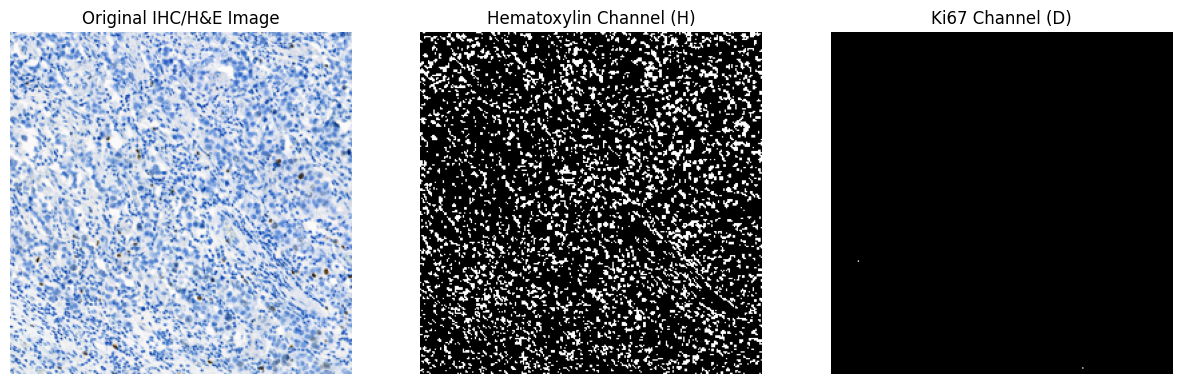

In [ ]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

ihc_rgb =io.imread("/content/drive/MyDrive/IHC2HE/IHC_patch_5X_BC/IHC_45_x5760_y7680.png")
hed_image = rgb2hed(ihc_rgb)

H = hed_image[:, :, 0]
D = hed_image[:, :, 2]

H_thresh = threshold_otsu(H)
D_thresh = threshold_otsu(D)

H_binary = (H > H_thresh).astype(float)
D_binary = (D > D_thresh).astype(float)

print(H_binary.shape)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ihc_rgb)
axes[0].set_title("Original IHC/H&E Image")
axes[0].axis("off")

# H channel
axes[1].imshow(H_binary, cmap="gray")
axes[1].set_title("Hematoxylin Channel (H)")
axes[1].axis("off")

# D channel
axes[2].imshow(D_binary, cmap="gray")
axes[2].set_title("Ki67 Channel (D)")
axes[2].axis("off")

plt.show()

### segmentation with Stardist

tutorial: https://www.youtube.com/watch?v=L3dZ6fgmllI

code adapted from the author's github

Instead of recoloring the image into brown and blue for background removal, we utilized StarDist to count normal and tumor cells. By summing up the total normal tissue area and tumor area, we calculated the tumor ratio.

Since Ki67 exclusively stains the nuclei of tumor cells, StarDist enables precise calculation of nuclei for all cells. This approach provides a more accurate comparison of tumor versus normal tissue proportions.

In [ ]:
# Separate the individual stains from the IHC image
def color_separate(ihc_rgb):

    #Convert the RGB image to HED using the prebuilt skimage method
    ihc_hed = rgb2hed(ihc_rgb)

    # Create an RGB image for each of the separated stains
    #Convert them to ubyte for easy saving to drive as an image
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = img_as_ubyte(hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1)))
    ihc_e = img_as_ubyte(hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1)))
    ihc_d = img_as_ubyte(hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1)))

    #Optional fun exercise of combining H and DAB stains into a single image with fluorescence look

    h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
    d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))

# Cast the two channels into an RGB image, as the blue and green channels
#Convert to ubyte for easy saving as image to local drive
    zdh = img_as_ubyte(np.dstack((null, d, h))) #DAB in green and H in Blue

    return (ihc_h, ihc_e, ihc_d, zdh)

In [ ]:
ihc_rgb =io.imread("/content/drive/MyDrive/IHC2HE/IHC_patch_5X_BC/IHC_45_x5760_y7680.png")
H,E,D,HD = color_separate(ihc_rgb)

Text(0.5, 1.0, 'E image')

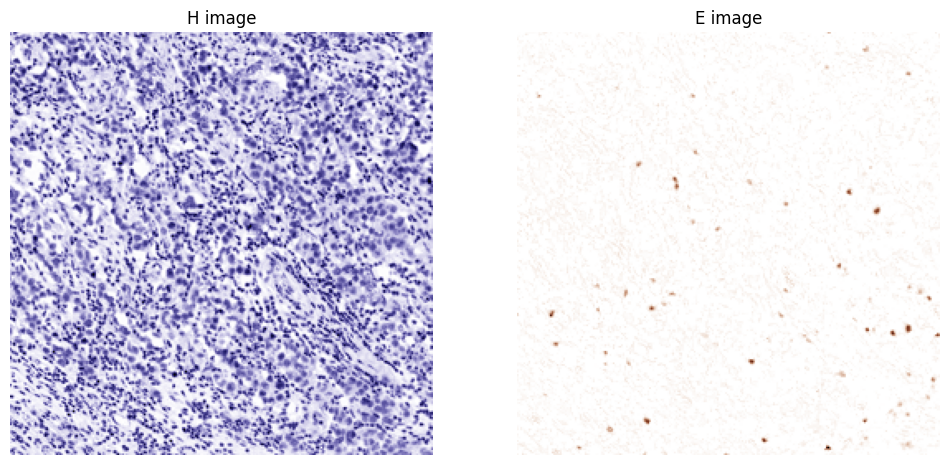

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H)
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(D)
plt.axis("off")
plt.title("E image")

In [ ]:
!pip install stardist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize

In [ ]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [ ]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Text(0.5, 1.0, 'D image')

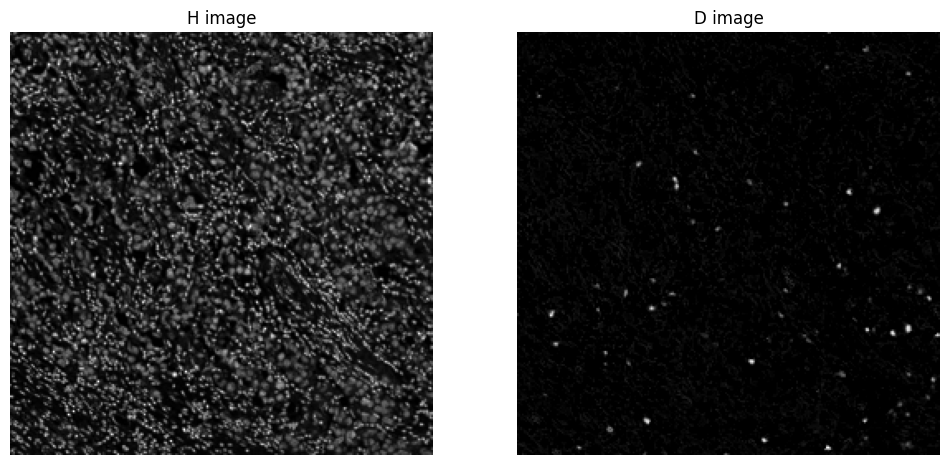

In [ ]:
H_img = np.invert(H[:,:,2])
D_img = np.invert(D[:,:,2])
#plt.imshow(D_img, cmap='gray')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H_img, cmap='gray')
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(D_img, cmap='gray')
plt.axis("off")
plt.title("D image")

In [ ]:
D_labels, D_details = model.predict_instances(normalize(D_img))

In [ ]:
H_labels, H_details = model.predict_instances(normalize(H_img))

Text(0.5, 1.0, 'prediction + input overlay')

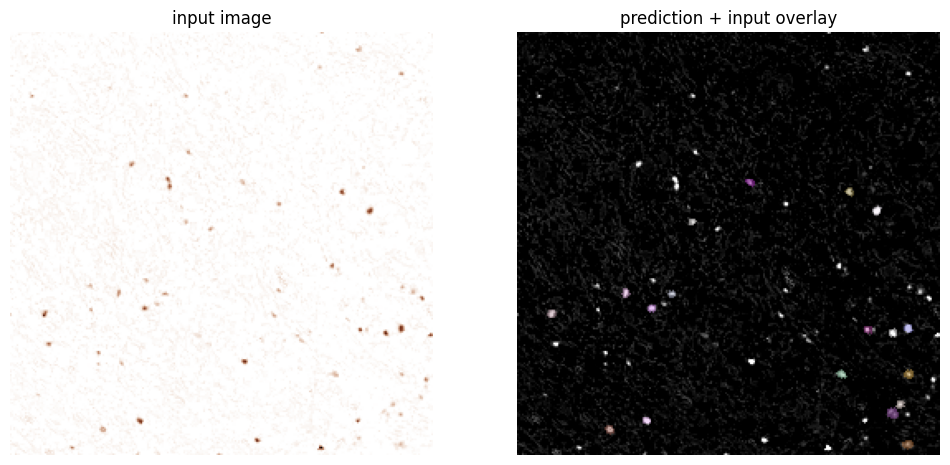

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(D)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(D_labels, img=D_img))
plt.axis("off")
plt.title("prediction + input overlay")

Text(0.5, 1.0, 'prediction + input overlay')

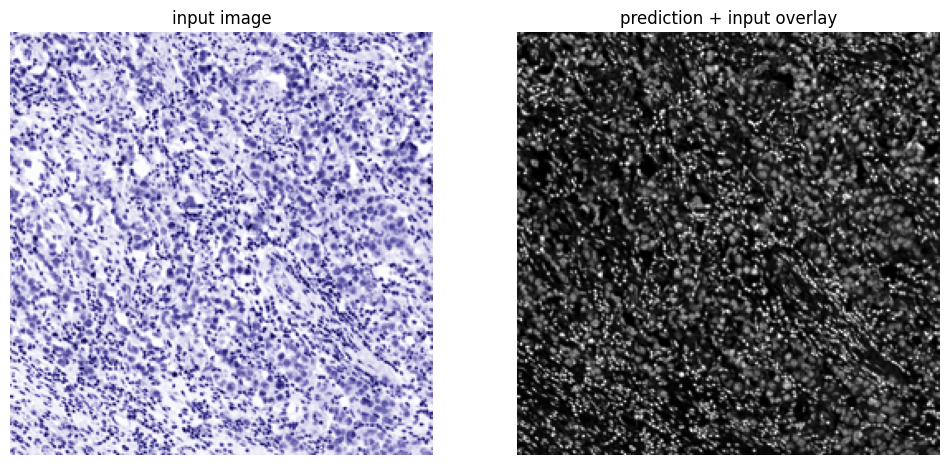

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(H_labels, img=H_img))
plt.axis("off")
plt.title("prediction + input overlay")

In [ ]:
H_props = regionprops_table(H_labels, H_img,
                          properties=['area'])
H_analysis_results = pd.DataFrame(H_props)


D_props = regionprops_table(D_labels, D_img,
                          properties=['area'])
D_analysis_results = pd.DataFrame(D_props)

print(H_analysis_results["area"].sum())
print(D_analysis_results["area"].sum())

0.0
428.0


##current step

In [ ]:
from skimage.measure import regionprops_table
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"
result = []

for filename in os.listdir(path):
    if filename.endswith(".png"):
        image_path = os.path.join(path, filename)
        img = io.imread(image_path)
        ihc_h, __, ihc_d, ___ = color_separate(img)
        H_img = np.invert(ihc_h[:,:,2])
        D_img = np.invert(ihc_d[:,:,2])

        #model = StarDist2D.from_pretrained('2D_versatile_fluo')

        H_labels, H_details = model.predict_instances(normalize(H_img))

        D_labels, D_details = model.predict_instances(normalize(D_img))

        H_props = regionprops_table(H_labels, H_img,
                          properties=['area'])
        H_analysis_results = pd.DataFrame(H_props)


        D_props = regionprops_table(D_labels, D_img,
                          properties=['area'])
        D_analysis_results = pd.DataFrame(D_props)

        H_total_area = H_analysis_results["area"].sum()
        D_total_area = D_analysis_results["area"].sum()

        positivity = D_total_area / (D_total_area + H_total_area)
        ratio_formatted = f"{positivity:.4f}"
        print(filename, "'s positivity ratio is: ", ratio_formatted)

        result.append([filename, ratio_formatted])


IHC_02_x22176_y3696.png 's positivity ratio is:  0.1491
IHC_02_x22176_y22176.png 's positivity ratio is:  0.2013
IHC_02_x7392_y29568.png 's positivity ratio is:  0.0722
IHC_02_x11088_y29568.png 's positivity ratio is:  0.1400
IHC_x22176_y11088.png 's positivity ratio is:  0.1514
IHC_x3696_y14784.png 's positivity ratio is:  0.0745
IHC_x22176_y14784.png 's positivity ratio is:  0.1801
IHC_x22176_y22176.png 's positivity ratio is:  0.2292
IHC_x22176_y25872.png 's positivity ratio is:  0.1250
IHC_03_x22176_y7392.png 's positivity ratio is:  0.0953
IHC_03_x18480_y7392.png 's positivity ratio is:  0.1612
IHC_03_x11088_y11088.png 's positivity ratio is:  0.1588
IHC_03_x36960_y18480.png 's positivity ratio is:  0.3078
IHC_03_x36960_y22176.png 's positivity ratio is:  0.2698
IHC_06_x11088_y25872.png 's positivity ratio is:  0.0947
IHC_06_x36960_y29568.png 's positivity ratio is:  0.1490
IHC_06_x25872_y33264.png 's positivity ratio is:  0.0784
IHC_06_x29568_y33264.png 's positivity ratio is:  0

In [ ]:
import csv

path = "/content/drive/MyDrive/CIT5810_Final_Project/"
with open(path+"tumor_ratios_IHC_Stardist.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)



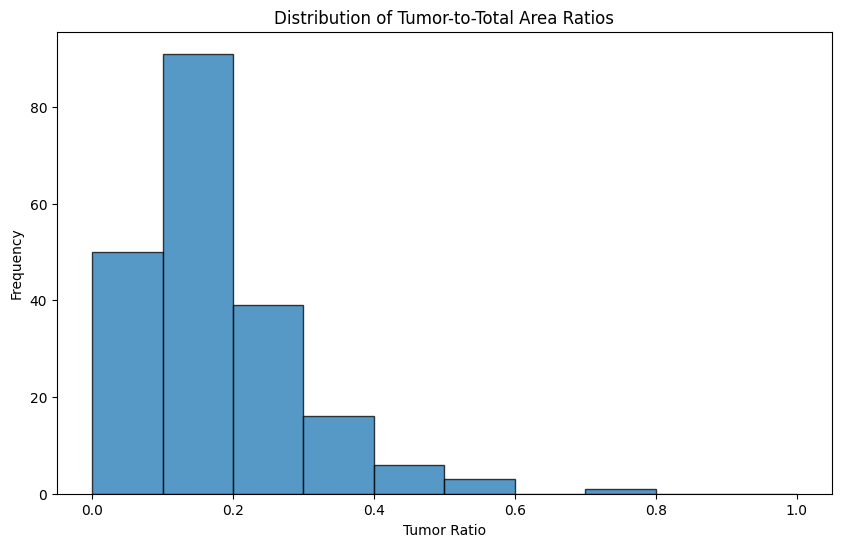

In [ ]:
import matplotlib.pyplot as plt


ratios = [float(row[1]) for row in result]

plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=10, edgecolor='black', range=(0, 1), alpha=0.75)
plt.title('Distribution of Tumor-to-Total Area Ratios')
plt.xlabel('Tumor Ratio')
plt.ylabel('Frequency')


# Display the plot
plt.show()

The results indicate that the tumor ratio is less skewed toward zero compared to the findings in the original paper.

Next, we applied the same method to H&E-stained images. However, identifying tumor cells in H&E stains requires features beyond color information from different channels, making the process more complex.

In [ ]:
he_rgb =io.imread("/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_62_x22176_y7392.png")
H,E,D,HD = color_separate(he_rgb)

Text(0.5, 1.0, 'E image')

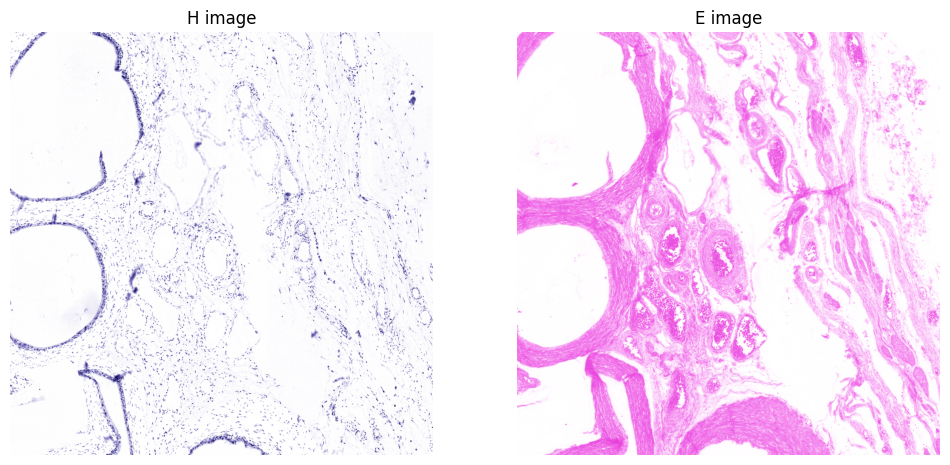

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H)
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(E)
plt.axis("off")
plt.title("E image")

Not going to work with H&E images. Color of the object is less important. Nuclear size, color balance, nuclear arrangement all contribute to the final decision.